In [1]:
comp='shannon'
meas = 'siliconta7_res1'

%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd 
import scresonators.measurement.handy as hy
import scresonators.measurement.helpers as helpers
import scresonators.fitting.ana_tls as ana_tls

helpers.config_figs()

if comp=='shannon':
    pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
elif comp=='bf1':
    pth_base='G:/'

data_folder = 'My Drive/Projects/Materials/'
pth = os.path.join(pth_base, data_folder)
img_pth = os.path.join(pth,'Outputs/Resonators/')

In [5]:
cfg, data_pth, folder, img_name, ind = hy.get_params('mini2.yml', meas, pth=pth)

FileNotFoundError: [Errno 2] No such file or directory: 'mini2.yml'

NameError: name 'cfg' is not defined

-54.020009904539855
-55.642463744984234
-57.40606893634474
-59.13166853102546
-60.23500551977927
-60.0248799955168
-62.089968747321336


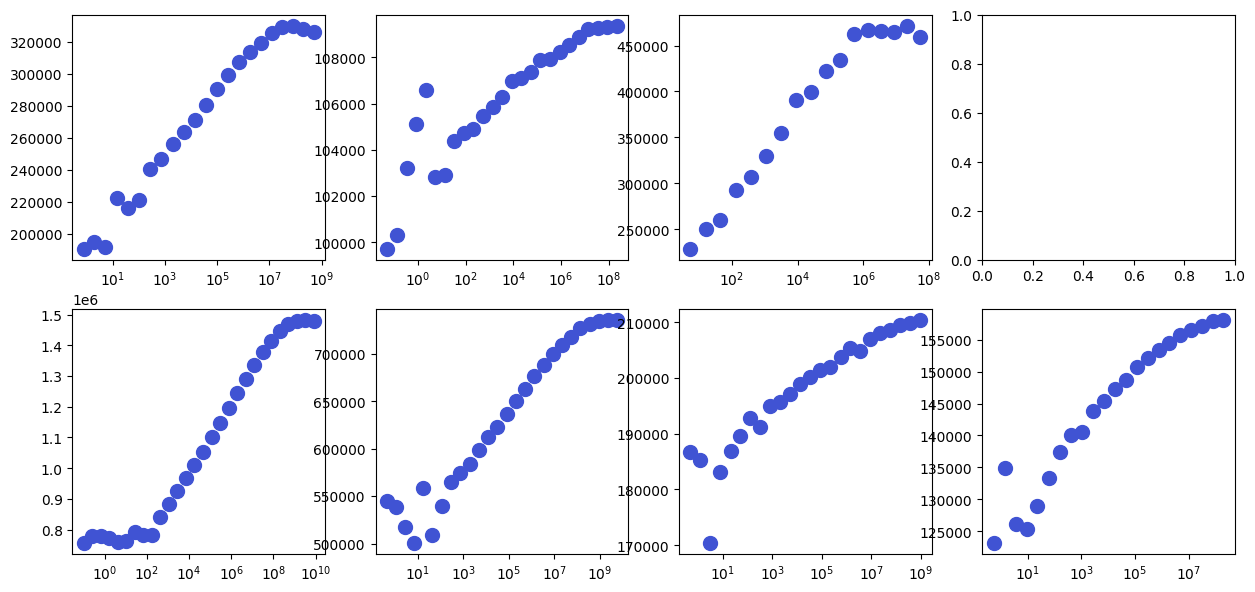

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(15, 7))
ax = ax.flatten()
df_full = pd.DataFrame()
ord = [4, 5, 6, 0, 7, 1, 2, 3, 4]

csv_files_in_dir = [f for f in os.listdir(os.path.join(data_pth, cfg['dir'][0])) if f.endswith('.csv') and f.startswith('fit_results')]
csv_files_in_dir.sort()

for i, csv_file in enumerate(csv_files_in_dir):
    for j in range(len(cfg['dir'])):
    
        file_path = os.path.join(data_pth, cfg['dir'][j], csv_file)
        df = pd.read_csv(file_path)

        df['pitch']=cfg['pitch'][i]
        df['target_freq']=cfg['target_freq'][i]
        df['resonator_id'] = i
        df['temp']=0.04

        if j==0: 
            max_pow = df['power_at_device_dBm'].max()
            df_copy = df.copy(deep=True)
            print(max_pow)
            #print(df_copy)
            #print(df_copy)
        else: 
            #print(df_copy)
            df_filtered = df[df['power_at_device_dBm'] > max_pow]
            df_combined = pd.concat([df_copy, df_filtered], ignore_index=True)            
            df_full = pd.concat([df_full, df_combined], ignore_index=True)
            #print(df_combined)

        #df_full = pd.concat([df_full, df], ignore_index=True)
        
        ax[ord[i]].semilogx(df['photon_number'], df['q_internal'],'o')

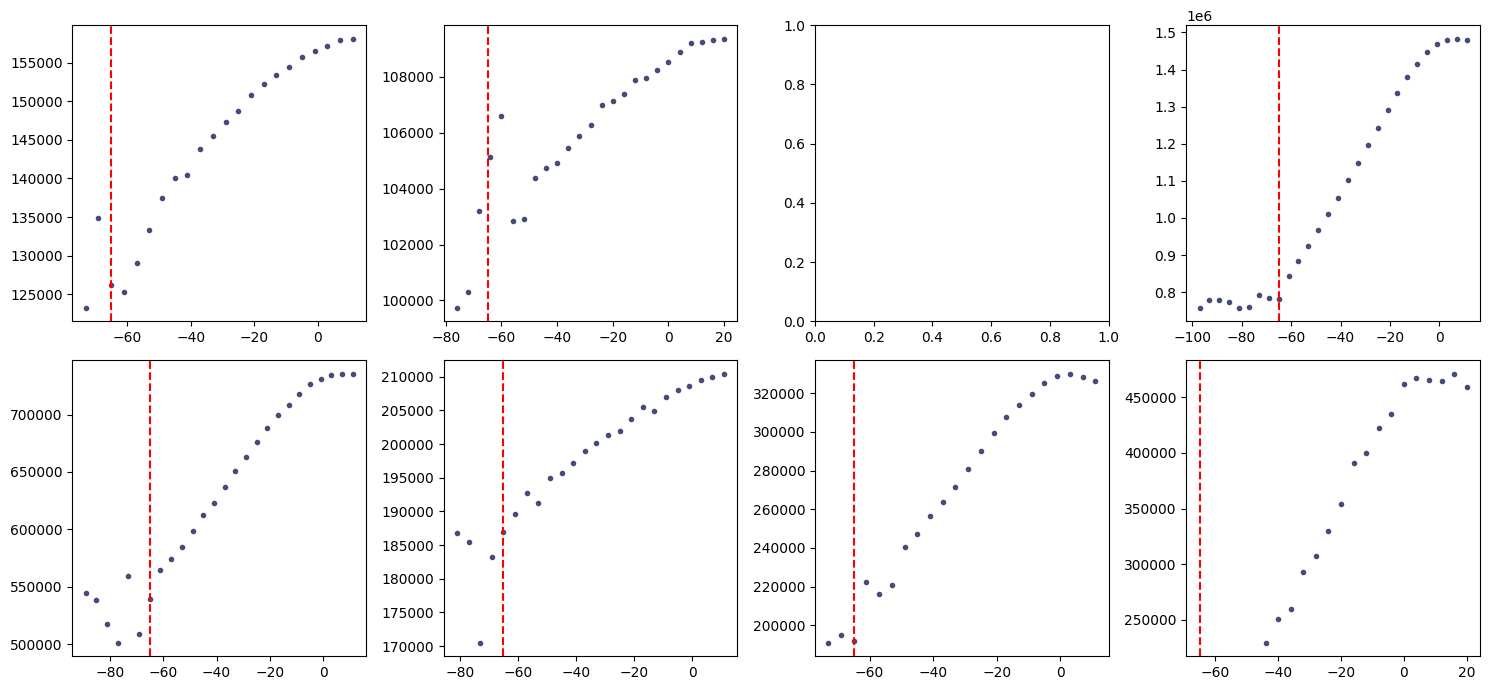

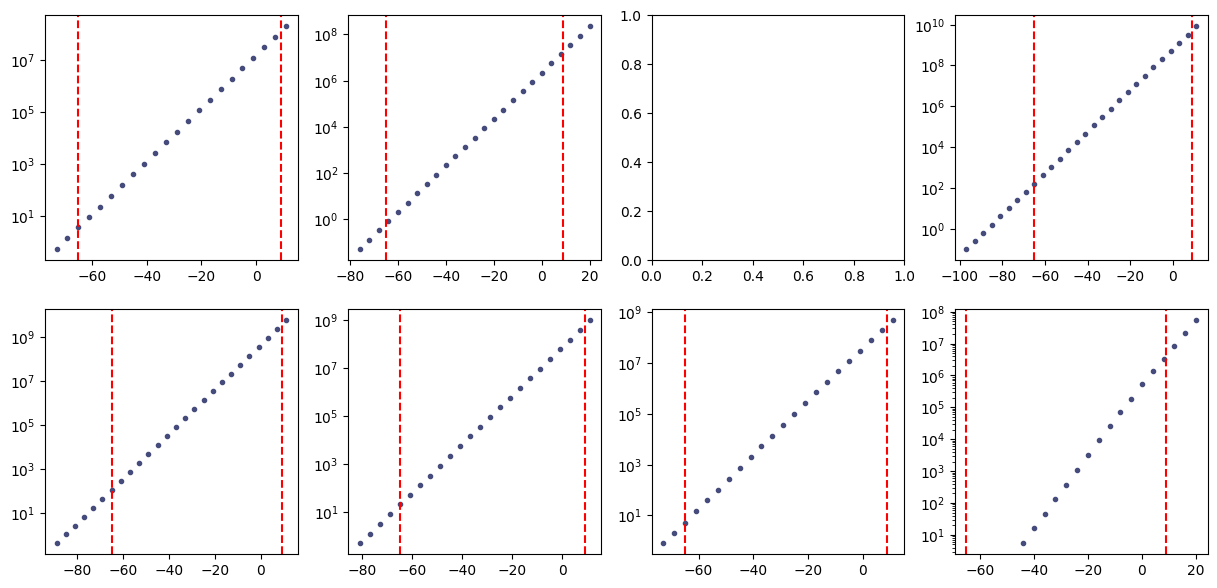

In [3]:
import pandas as pd
fig, ax = plt.subplots(2,4, figsize=(15, 7))
ax = ax.flatten()
df_full = pd.DataFrame()
#ord = [4, 5, 6, 0, 7, 1, 2, 3, 4]
ord = [3, 4, 5, 6, 0, 1,7, 2]


fig2, ax2 = plt.subplots(2,4, figsize=(15, 7))
ax2 = ax2.flatten()

full_path = os.path.join(data_pth, cfg['dir'][0])
csv_files_in_dir = [f for f in os.listdir(full_path) if f.endswith('.csv')]
csv_files_in_dir.sort()
    #print(csv_files_in_dir)
for i, csv_file in enumerate(csv_files_in_dir):
    file_path = os.path.join(full_path, csv_file)
    df = pd.read_csv(file_path)

    df['pitch']=cfg['pitch'][i]
    df['target_freq']=cfg['target_freq'][i]
    df['resonator_id'] = i
    df['temp']=0.04
    df_full = pd.concat([df_full, df], ignore_index=True)
    xval = df['photon_number']
    xval = df['power_dBm']
    ax[ord[i]].plot(xval, df['q_internal'],'.')
    ax2[ord[i]].semilogy(df['power_dBm'],df['photon_number'],'.')
    ax[ord[i]].axvline(x=-65, color='r', linestyle='--')
    ax2[ord[i]].axvline(x=-65, color='r', linestyle='--')
    ax2[ord[i]].axvline(x=9, color='r', linestyle='--')
fig.tight_layout()

In [ ]:
df_full = df_full.sort_values(by='pitch')

5.508473074023363
4.964616769366768
3.6994344276396314
166.90003403663962
111.61109776961383
20.880911858122968
0.8310242060785954


/var/folders/00/4dhzg6ms0xl3w8qywb_l4_nw0000gn/T/ipykernel_41252/1285570960.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


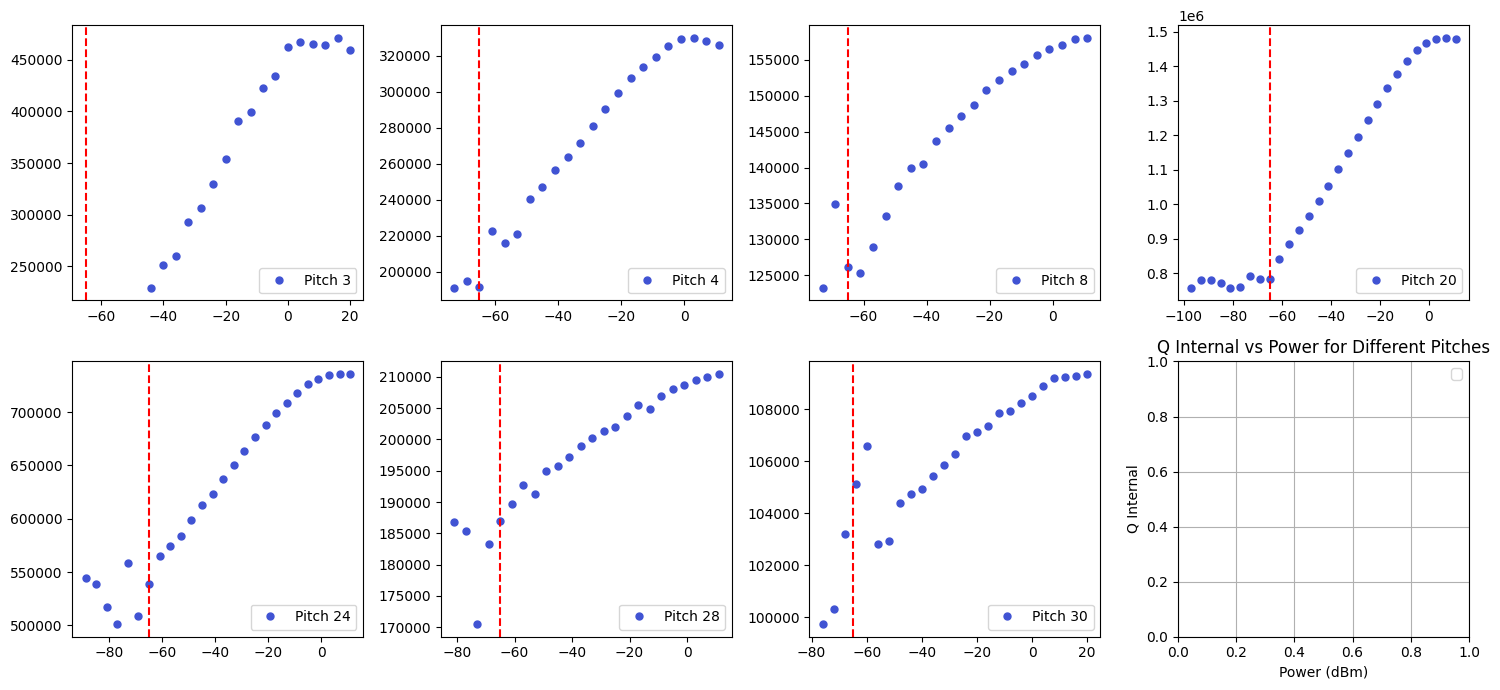

In [75]:
fig, ax = plt.subplots(2, 4, figsize=(15, 7))
ax = ax.flatten()
i=0
for pitch, subset in df_full.groupby('pitch'):
    ax[i].plot(subset['power_dBm'], subset['q_internal'], '.', label=f'Pitch {pitch}')
    ind_closest = (subset['power_dBm'] - (-65)).abs().idxmin()
    print(subset['photon_number'][ind_closest])
    #ax[i].axvline(x=subset.loc[ind_closest, 'power_dBm'], color='g', linestyle='--')
    ax[i].axvline(x=-65, color='r', linestyle='--')
    
    ax[i].legend()
    i+= 1
plt.xlabel('Power (dBm)')
plt.ylabel('Q Internal')
plt.legend()
plt.title('Q Internal vs Power for Different Pitches')
plt.grid(True)
fig.tight_layout()

In [84]:
df_30 = df_full[df_full['pitch'] == 30].sort_values(by='power_at_device_dBm')

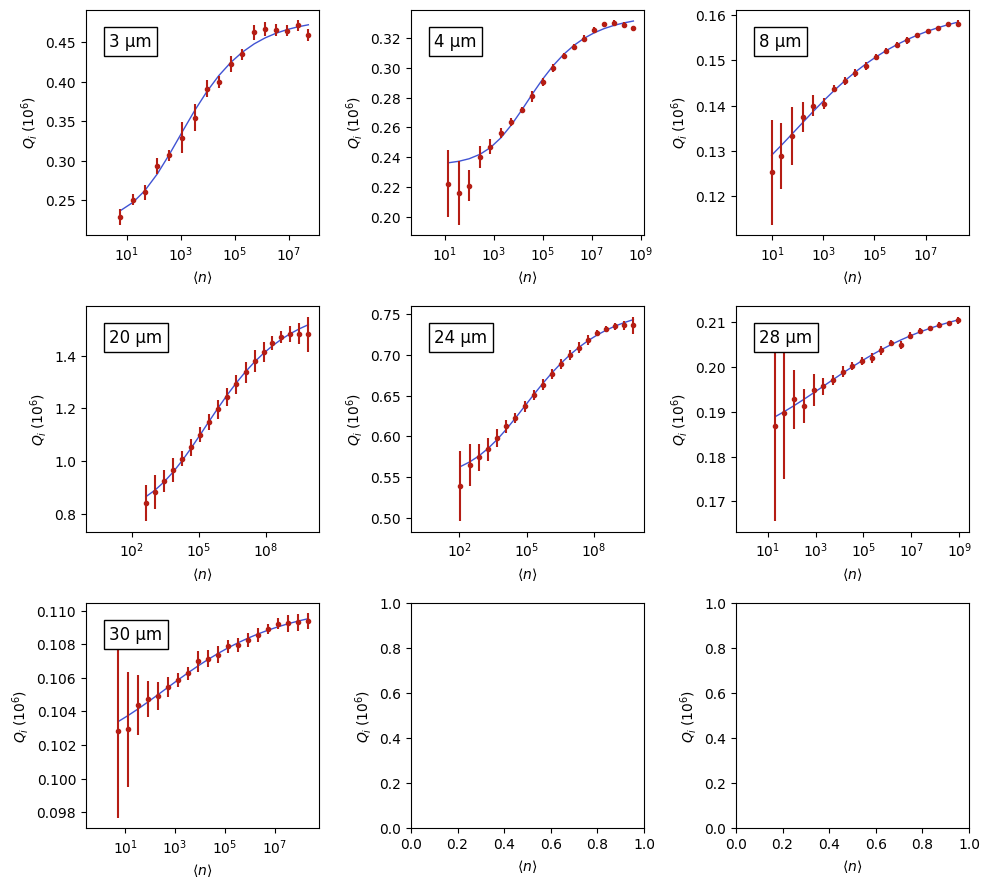

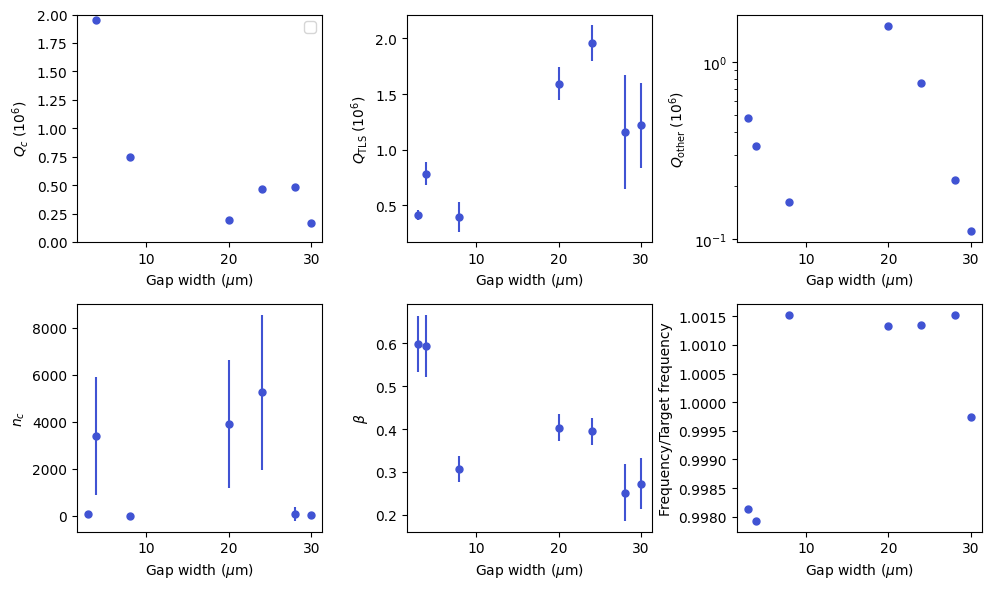

In [77]:
#max_photon = [4e7, 4e7, 1e10, 3e8, 0.8e8, 1e8, 5e8]
#min_photon = [0.1, 1,1, 1,1,1,1]
min_photon = [5, 5, 5, 170, 100, 20, 5]
#params = ana_tls.fit_qi2(df_full, img_pth, name=img_name)#, max_photon_vec=max_photon, min_photon_vec=min_photon) 
params = ana_tls.fit_qi2(df_full, img_pth, name=img_name, min_photon_vec=min_photon) 
ana_tls.plot_res_pars([params], [''],img_pth, name=img_name)

In [78]:
hy.save_np(params, img_pth+'Text/' +cfg['pth'][ind][0:-1] +cfg['meas'][ind] + '.yml')